In [1]:
import dicom
import os
import sys
import glob
import numpy as np
from collections import Counter,OrderedDict
import matplotlib.pyplot as plt
sys.path.append("..")
from utils import getImageBlock

## Inputs to Function

In [2]:
patientID = 'UCLA_PR_5'
DATA_PATH = '/home/radiation/RadiationTherapyDecisionSupport/data/'
ct_files = glob.glob(DATA_PATH + patientID + '/' + 'CT*.dcm')
num_ct_scans = len(ct_files)
images = OrderedDict()
for file in ct_files:
    df = dicom.read_file(file)
    if df.pixel_array is not None:
        #Based on the slicelocation to find where is the head where is the feet
        images[df.SliceLocation] = (df.SOPInstanceUID,df.pixel_array)
    else:
        print("No images")

In [3]:
rows = df.Rows
cols = df.Columns
num_cts = len(images)


## Function

In [4]:
imageBlock, sopUID = getImageBlock(images, rows, cols, num_cts)

## Testing Function

We display 10 CT images to confirm that the CT images are 

*In Head to Leg order

*Of the proper resolution (512 x 512) and can be displayed as CT scans in grayscale

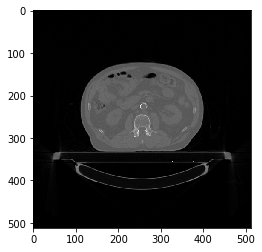

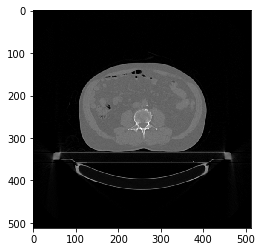

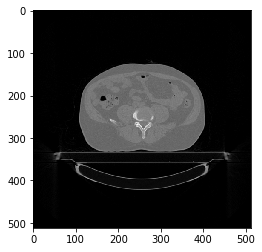

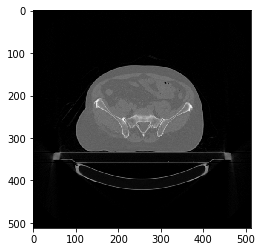

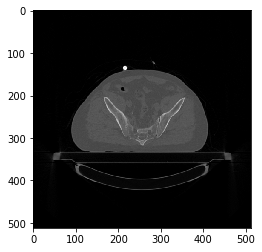

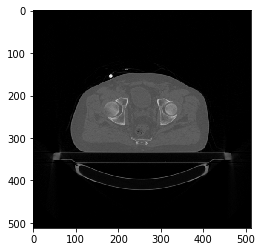

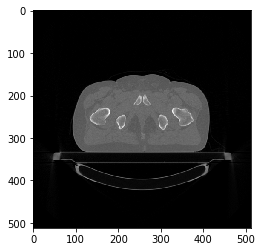

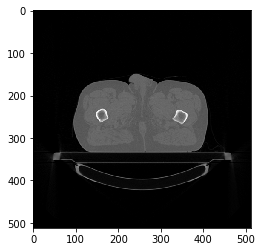

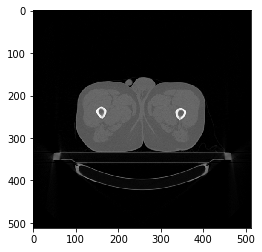

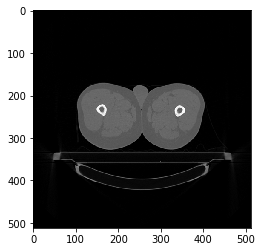

In [5]:
for index in range(0, 300, 30):
        plt.figure(index)
        plt.imshow(imageBlock[:,:,index],cmap=plt.get_cmap('gray'))
        plt.show()